## Multiple Linear Regression and Regression Error Metrics

simple linear regression   = b0 + b1 * X 

Multiple linear regression = b0 + b1*X1 + b2*X2 + b3*X3+ .............

X1 = TV

X2 = radio

X3 = newspaper

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # pip install scipy
from scipy.stats import skew

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.shape

(7385, 12)

In [5]:
df.isnull()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
import missingno as msno

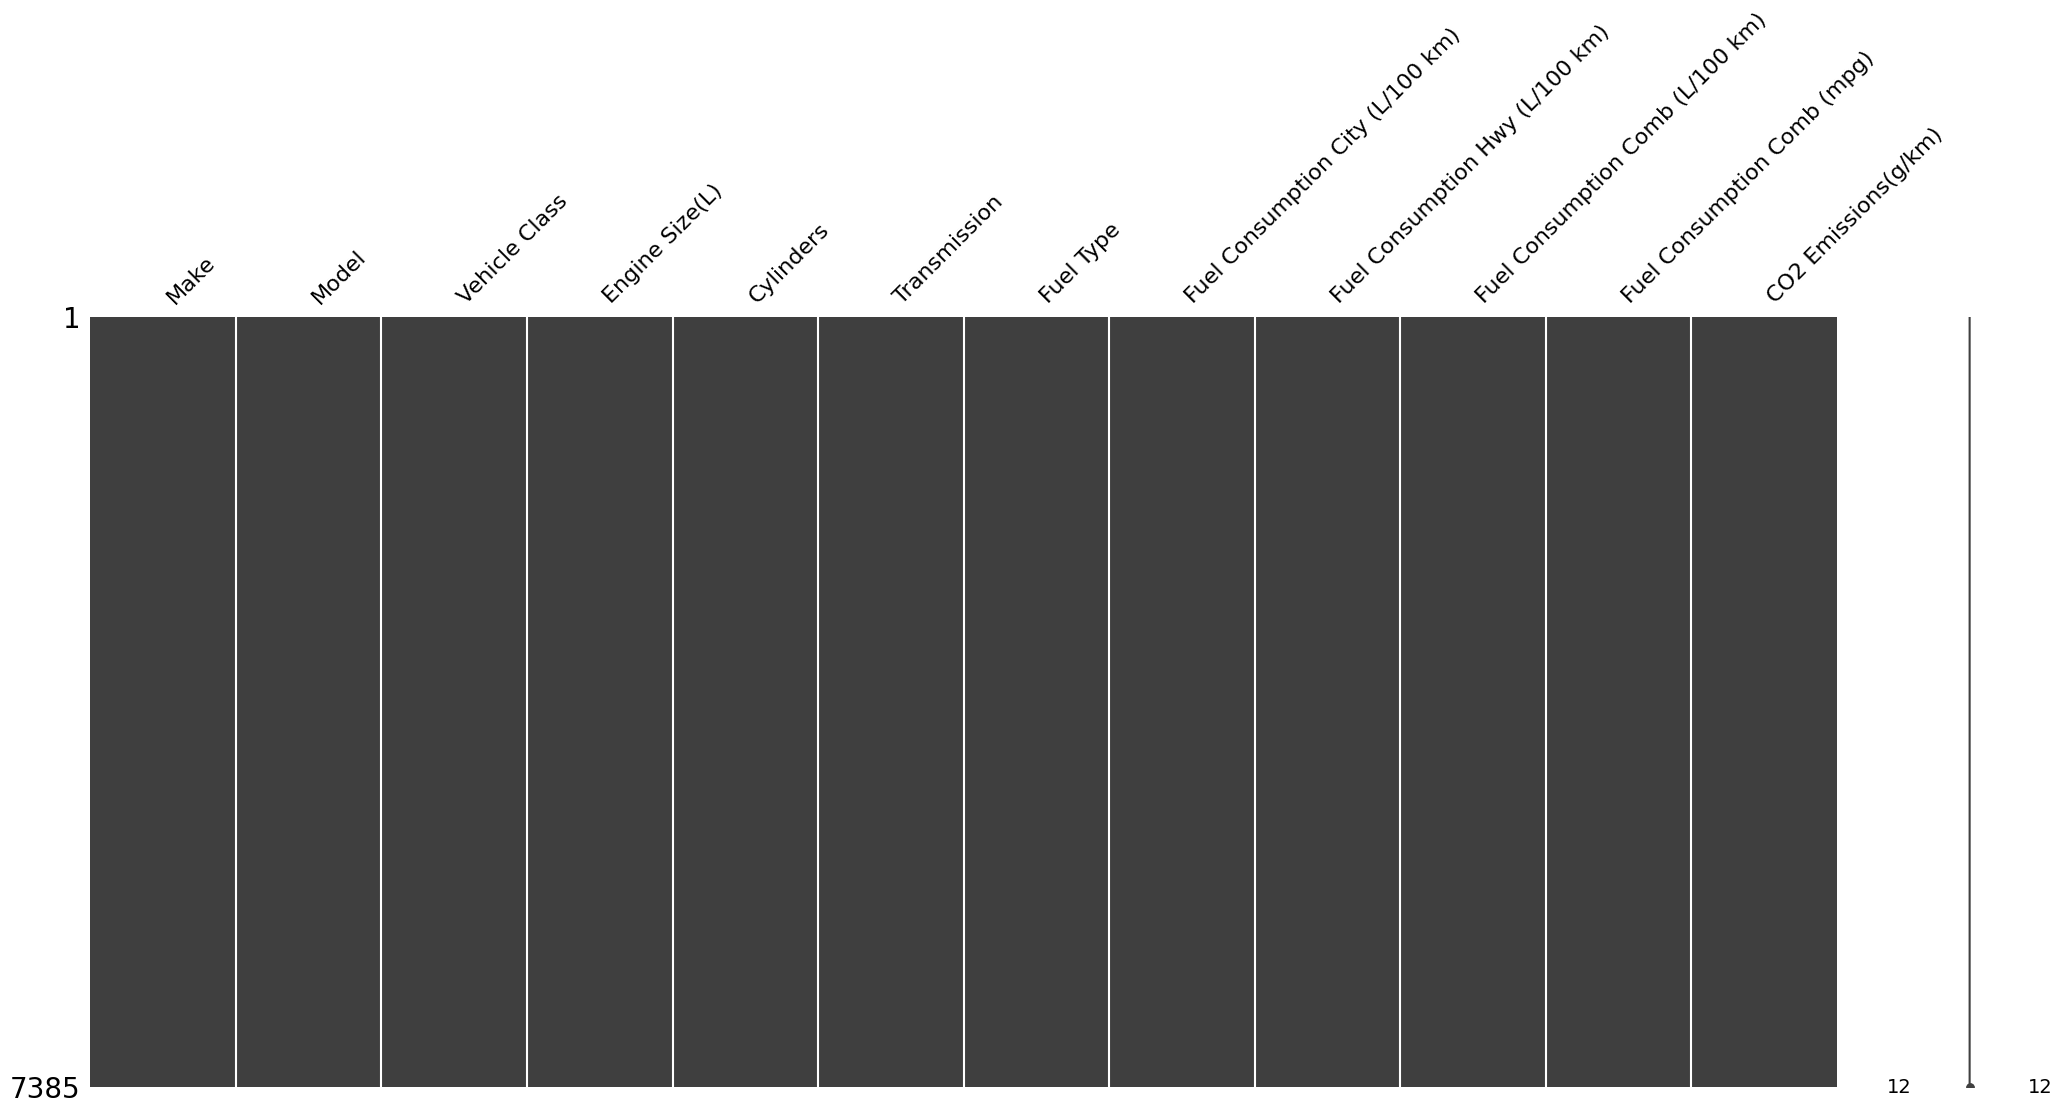

In [8]:
msno.matrix(df);

In [9]:
df.sort_values(by = "CO2 Emissions(g/km)", ascending = False)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
7059,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
...,...,...,...,...,...,...,...,...,...,...,...,...
6949,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.2,4.2,4.2,67,99
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
4900,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
6950,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [11]:
print(np.mean([100, 110, 120, 115])) #outliar yok
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [12]:
print(np.mean([100, 110, 120, 700])) #outliar var
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [13]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


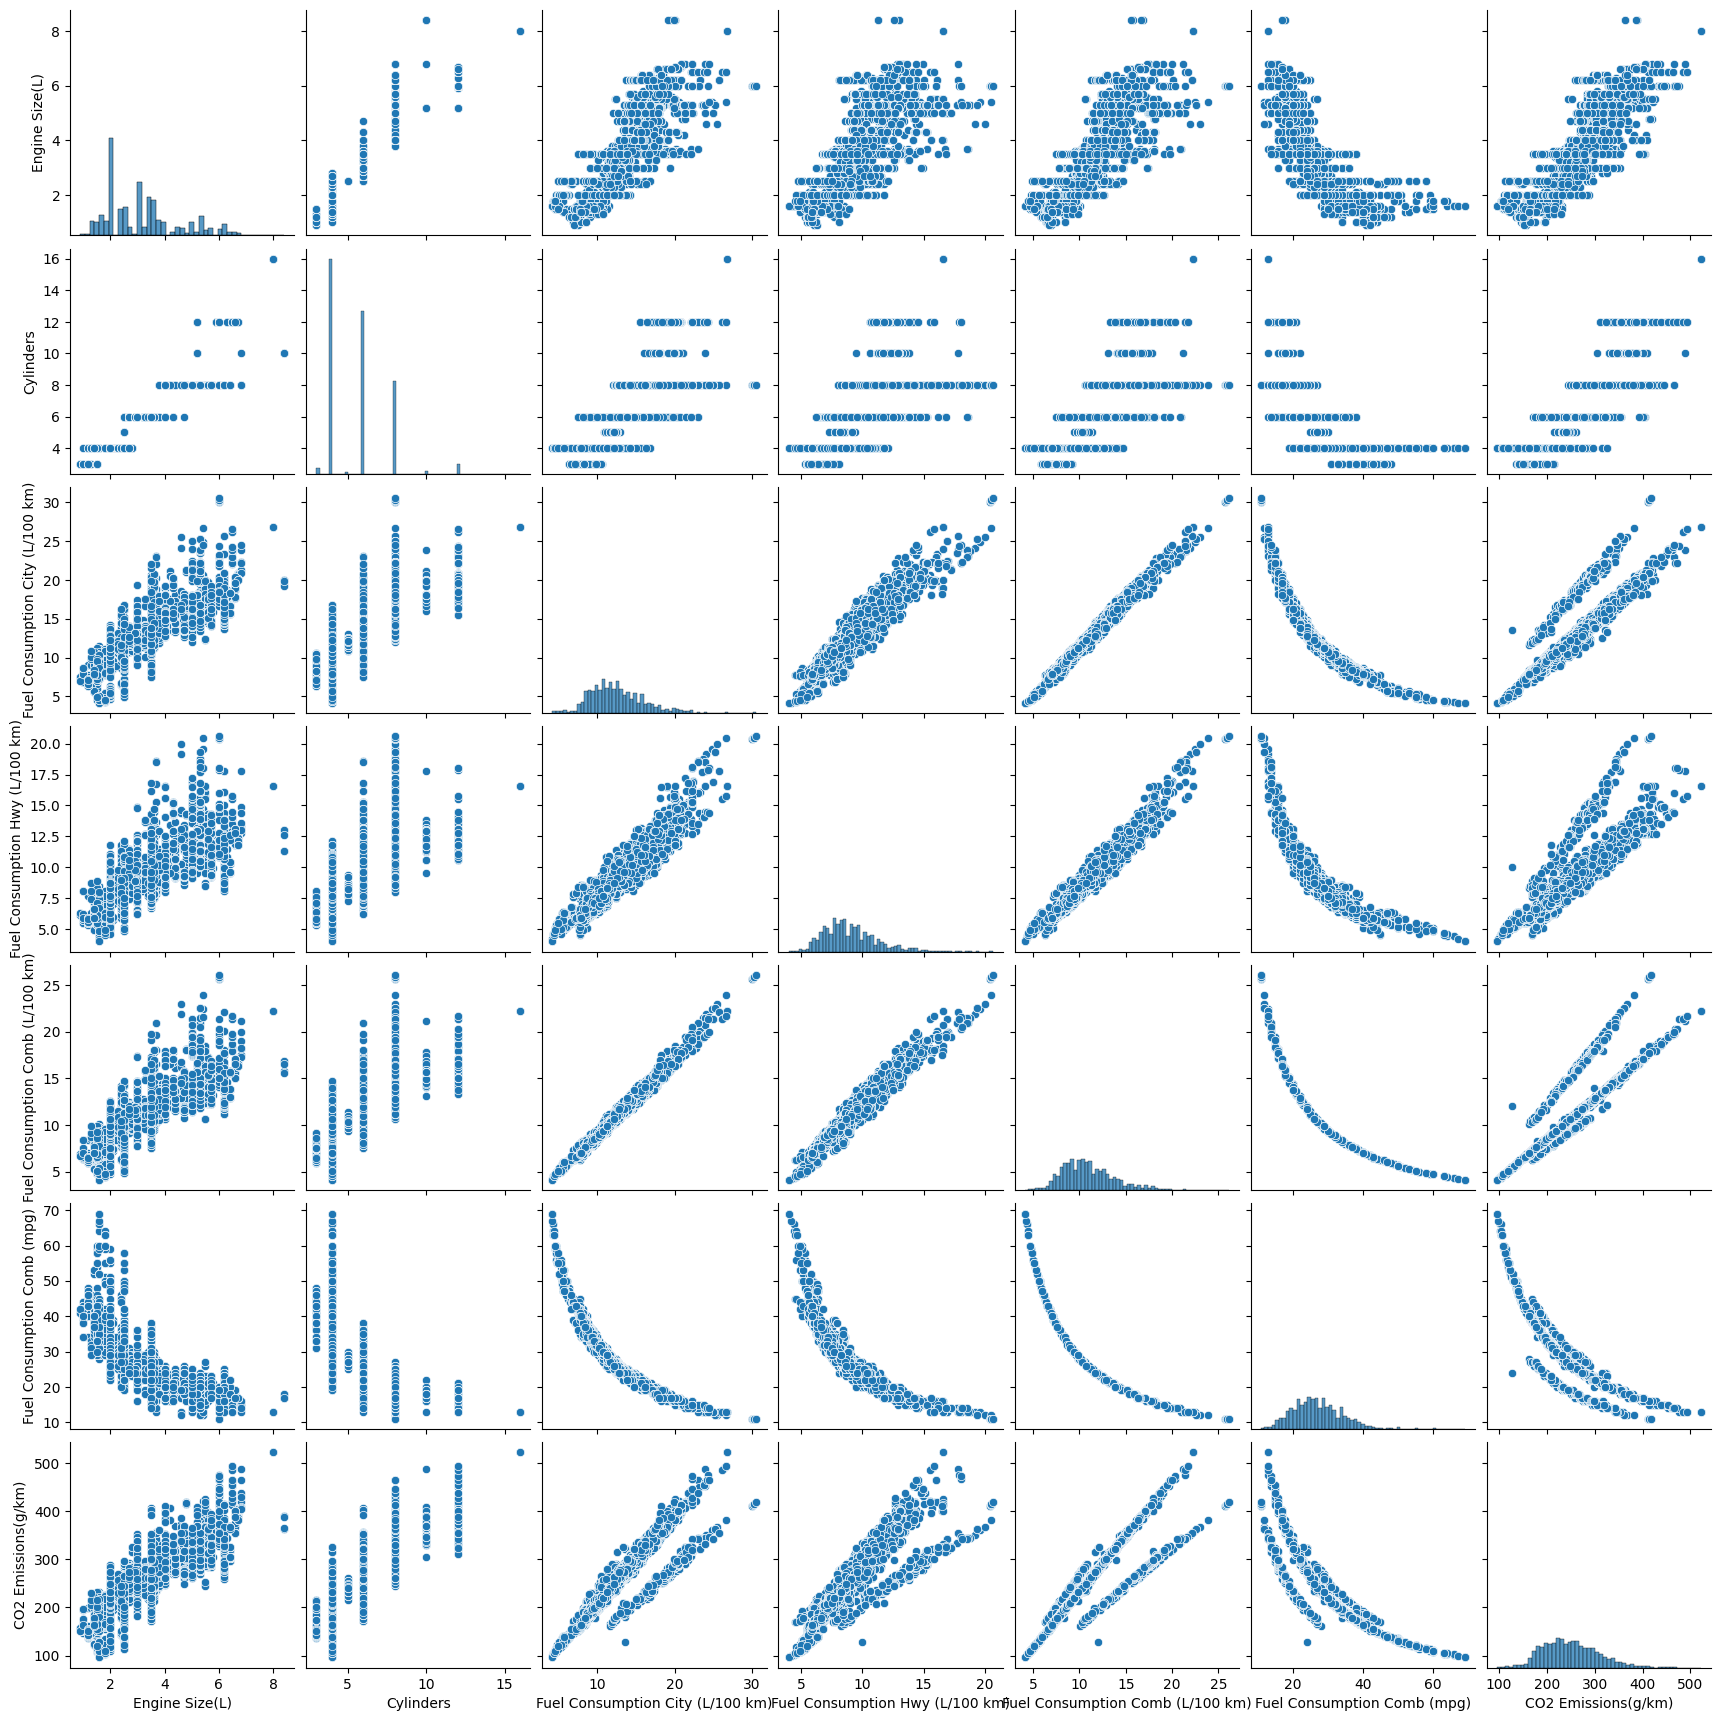

In [11]:
sns.pairplot(df);

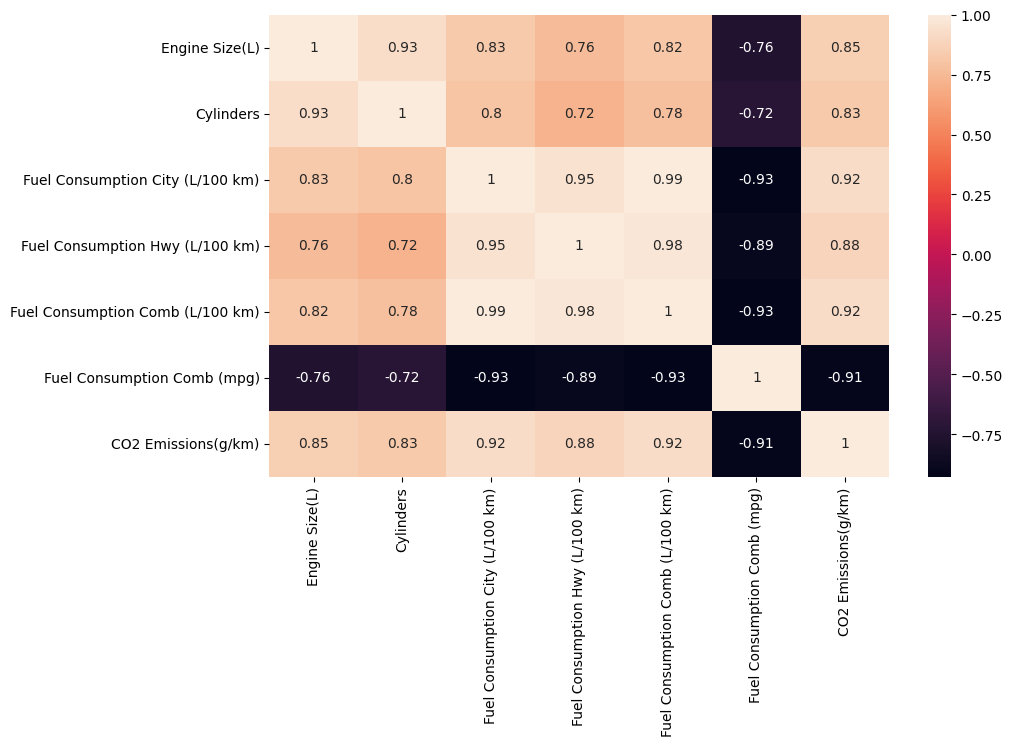

In [12]:
sns.heatmap(df.corr(), annot = True);

In [17]:
from scipy.stats import skew

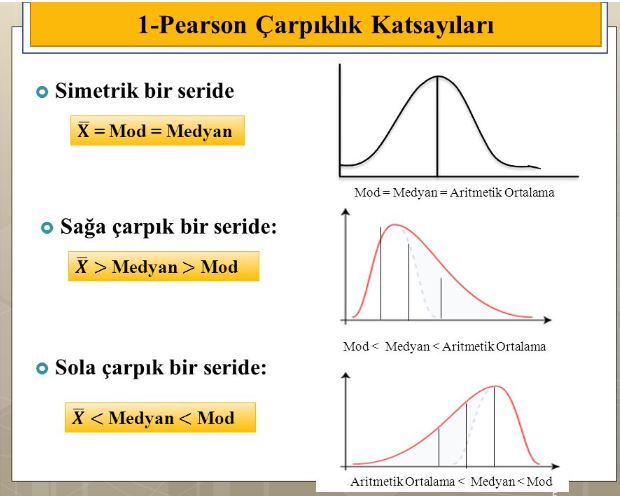

In [19]:
for i in df.drop(columns = ["Make","Model","Vehicle Class","Transmission","Fuel Type","CO2 Emissions(g/km)"]).columns:
    print(i, skew(df[i]))

Engine Size(L) 0.8090166237091084
Cylinders 1.1101898640440213
Fuel Consumption City (L/100 km) 0.8088403827811873
Fuel Consumption Hwy (L/100 km) 1.078997475325438
Fuel Consumption Comb (L/100 km) 0.8931342662031229
Fuel Consumption Comb (mpg) 0.9768356000735062


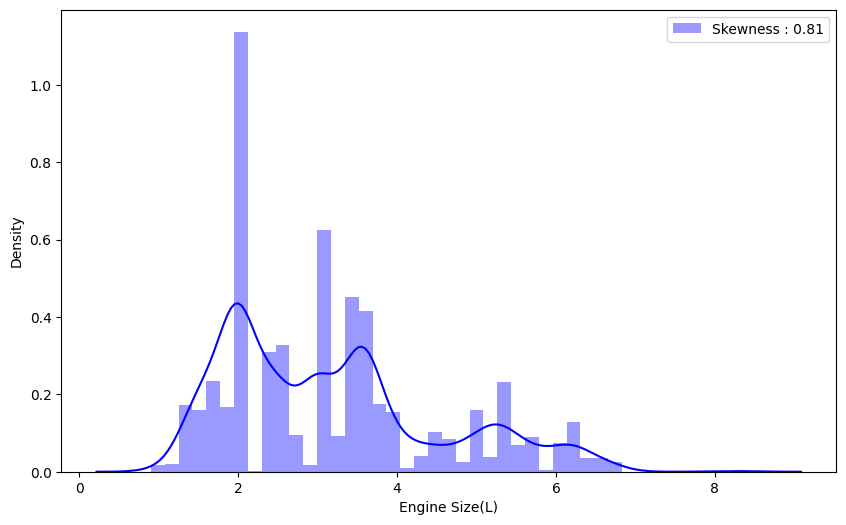

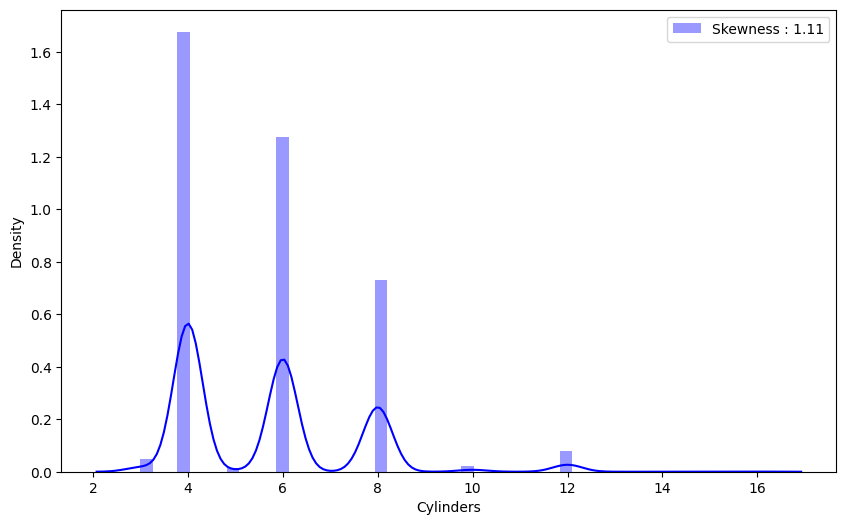

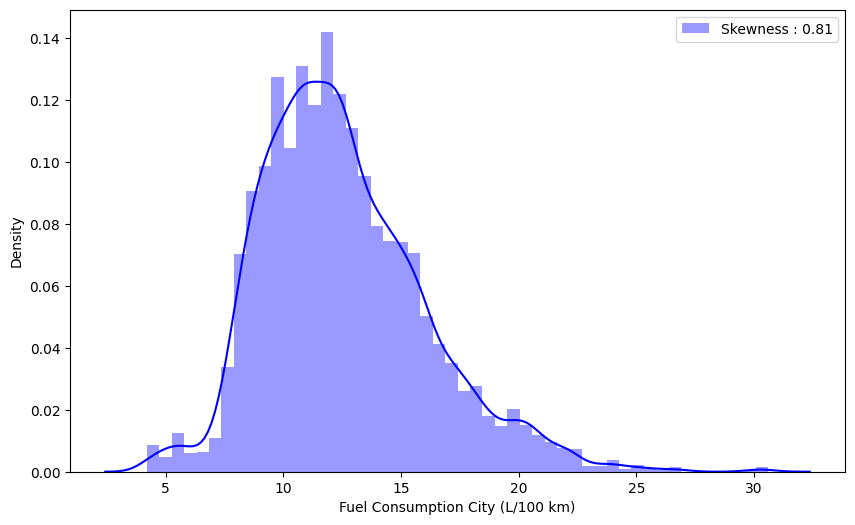

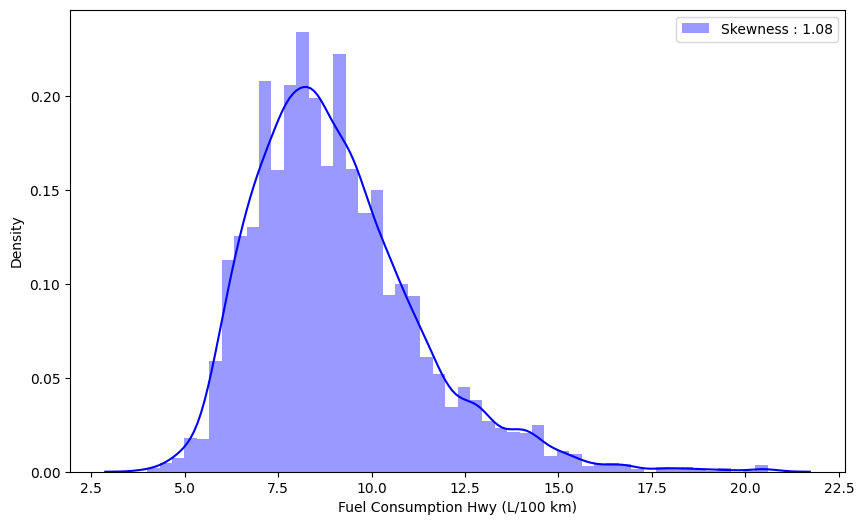

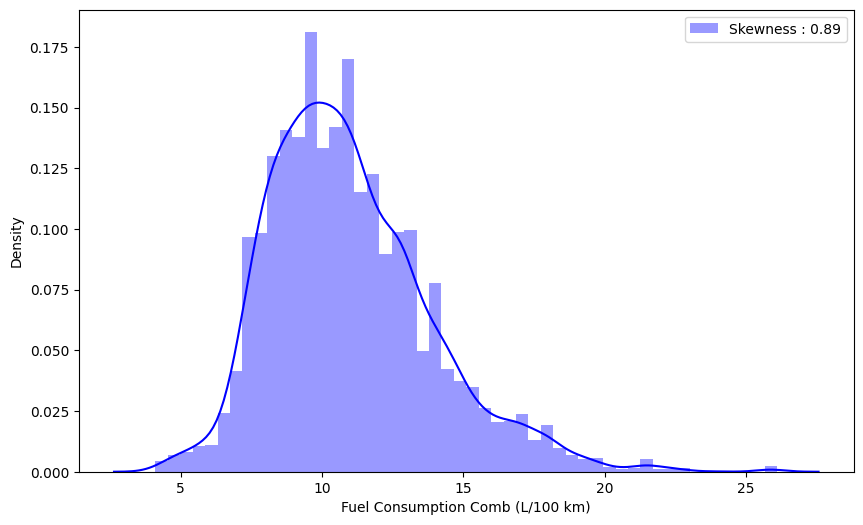

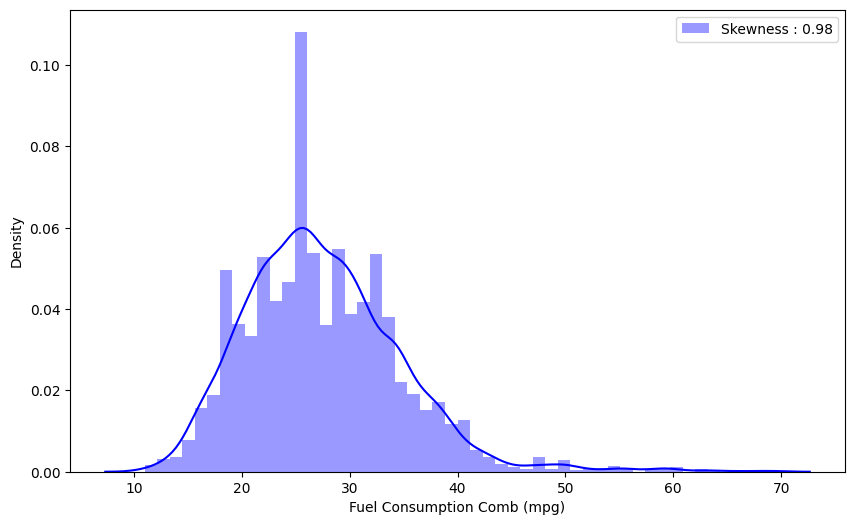

In [20]:
for j in df.drop(columns = ["Make","Model","Vehicle Class","Transmission","Fuel Type","CO2 Emissions(g/km)"]).columns:
    g = sns.distplot(df[j], color = "b", label = "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc = "best")
    plt.show()

In [21]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


TV <-> sales        = 0.78 = Kuvvetli (güçlü) doğrusal pozitif ilişki var
 
Radio <-> sales     = 0.58 = Orta kuvvetli dogrusal pozitif ilişki var
 
Newspaper <-> sales = 0.23 = Çok düşük kuvvetli (zayıf) doğrusal

## Train - Test Split

Datamız 1000'e kadar ise %30-20 test, %70-80 train

Datamız 1000-100.000 ise %10-20 test, %90-80 train

Datamız 100.000 - 1.000.000 ise %5 test, %95 train

Datamız 1.000.000 büyük ise %1 test, %99 train

En düşük oran ise %30 test, %70 train olabilir. Train datasının fazla olması önemlidir.

In [25]:
X=df[['Engine Size(L)','Fuel Consumption Comb (L/100 km)','Cylinders']]

y=df['CO2 Emissions(g/km)']

print(X, y)

      Engine Size(L)  Fuel Consumption Comb (L/100 km)  Cylinders
0                2.0                               8.5          4
1                2.4                               9.6          4
2                1.5                               5.9          4
3                3.5                              11.1          6
4                3.5                              10.6          6
...              ...                               ...        ...
7380             2.0                               9.4          4
7381             2.0                               9.9          4
7382             2.0                              10.3          4
7383             2.0                               9.9          4
7384             2.0                              10.7          4

[7385 rows x 3 columns] 0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int

In [24]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 44)

In [27]:
df.sample(15)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7341,TOYOTA,Prius,MID-SIZE,1.8,4,AV,X,4.4,4.7,4.5,63,106
3130,PORSCHE,911 TURBO S CABRIOLET,MINICOMPACT,3.8,6,AM7,Z,13.7,9.6,11.9,24,278
6508,ACURA,RDX AWD A-SPEC,SUV - SMALL,2.0,4,AS10,Z,11.3,9.1,10.3,27,241
2677,GMC,TERRAIN,SUV - SMALL,2.4,4,A6,X,10.5,7.3,9.1,31,214
1505,FORD,MUSTANG CONVERTIBLE,SUBCOMPACT,2.3,4,AS6,X,11.6,7.9,9.9,29,228
909,PORSCHE,PANAMERA 4S EXECUTIVE,FULL-SIZE,3.0,6,AM7,Z,13.7,8.9,11.5,25,264
1508,FORD,T-150 WAGON FFV,VAN - PASSENGER,3.7,6,AS6,X,16.6,12.6,14.8,19,340
4882,HONDA,HR-V AWD,STATION WAGON - SMALL,1.8,4,AV,X,8.9,7.5,8.2,34,194
4934,JAGUAR,F-TYPE CONVERTIBLE,TWO-SEATER,3.0,6,AS8,Z,11.9,8.5,10.4,27,242
2737,HYUNDAI,GENESIS COUPE,SUBCOMPACT,3.8,6,M6,Z,14.1,9.6,12.1,23,283


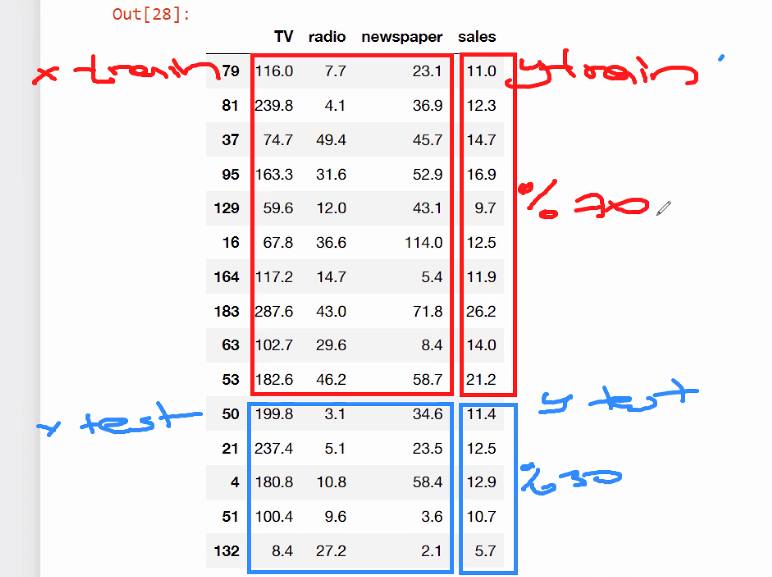

In [29]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (6277, 3)
y Train features shape: (6277,)
X Test features shape : (1108, 3)
Y Test features shape : (1108,)


In [26]:
#Print("Train features shape: ", X_train.shape)
#Print("Train target shape: ", y_train.shape)
#Print("Test features shape: ", X_test.shape)
#Print("Test target shape: ", y_test.shape)

In [30]:
X_train

,Engine Size(L),Fuel Consumption Comb (L/100 km),Cylinders
2063,6.7,17.2,12
4508,4.4,14.6,8
1763,3.5,7.5,6
4233,3.0,12.2,6
1665,2.4,12.9,4
...,...,...,...
571,2.4,10.0,4
1197,4.4,12.3,8
2801,3.2,10.9,6
3491,6.2,12.1,8


In [31]:
y_train

2063    396
4508    341
1763    172
4233    285
1665    206
       ... 
571     230
1197    283
2801    256
3491    284
5908    181
Name: CO2 Emissions(g/km), Length: 6277, dtype: int64

## Model Fitting and Compare Actual and Predicted Labels

In [55]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression() 

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
y_pred

array([260.68405068, 254.55057026, 274.0755537 , ..., 200.83074895,
       307.15271627, 322.97042705])

In [36]:
model.coef_

array([ 5.58837654, 13.01665562,  6.76922268])

In [37]:
X_test.head()

,Engine Size(L),Fuel Consumption Comb (L/100 km),Cylinders
4905,3.3,11.5,6
307,3.6,10.9,6
2543,3.6,12.4,6
5251,1.6,8.2,4
6121,2.0,7.7,4


In [38]:
model.intercept_

51.93553237370179

y_pred = b1*TV + b2*radio + b3*newspaper + b0

In [42]:
sum(X_test.loc[4905] * model.coef_) + model.intercept_#manual

260.684050675417

In [39]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [40]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
4905,269,260.684051,8.315949
307,251,254.550570,-3.550570
2543,292,274.075554,17.924446
5251,193,194.690402,-1.690402
6121,179,190.417424,-11.417424
...,...,...,...
1962,177,188.182074,-11.182074
2878,291,270.722528,20.277472
3043,199,200.830749,-1.830749
1658,306,307.152716,-1.152716


In [41]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
4905,269,260.684051,8.315949
307,251,254.550570,-3.550570
2543,292,274.075554,17.924446
5251,193,194.690402,-1.690402
6121,179,190.417424,-11.417424
4131,196,199.529083,-3.529083
4712,288,337.298329,-49.298329
1729,288,273.700706,14.299294
992,110,151.551448,-41.551448
3765,223,269.451043,-46.451043


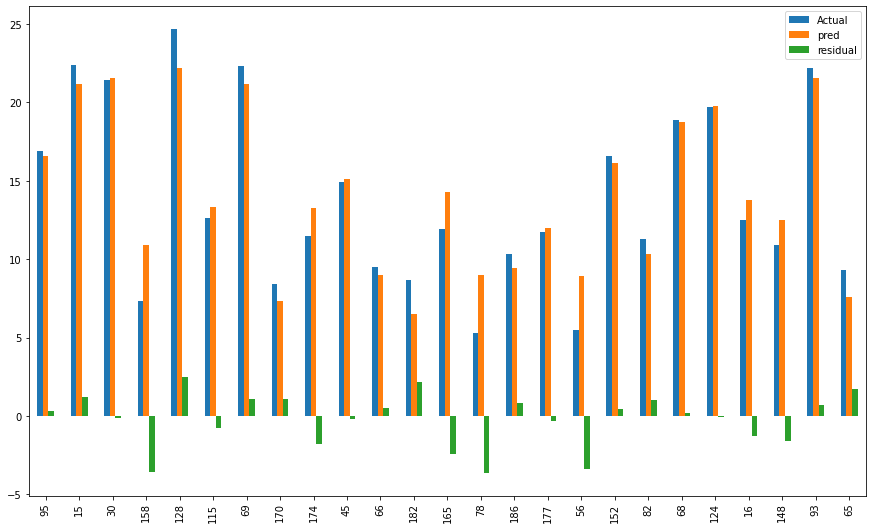

In [40]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

## Error Metrics

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.893292132043441

In [45]:
mae = mean_absolute_error(y_test, y_pred)
mae

12.91332691777009

In [46]:
mse = mean_squared_error(y_test, y_pred)
mse

360.557023084466

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

18.988339134438956

In [48]:
sales_mean = df["CO2 Emissions(g/km)"].mean()
sales_mean

250.58469871360867

In [49]:
mae / sales_mean

0.05153278306321741

In [50]:
rmse / sales_mean

0.07577613171082159

## What is the concept of punishment for RMSE error metric?

## Evaluation Model

In [59]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [60]:
y_train_pred = model.predict(X_train)

In [61]:
eval_metric(y_train, y_train_pred)

TypeError: 'numpy.float64' object is not callable

In [62]:
eval_metric(y_test, y_pred)

TypeError: 'numpy.float64' object is not callable

## Is data suitable for linear regression?

In [65]:
residuals = y_test - y_pred

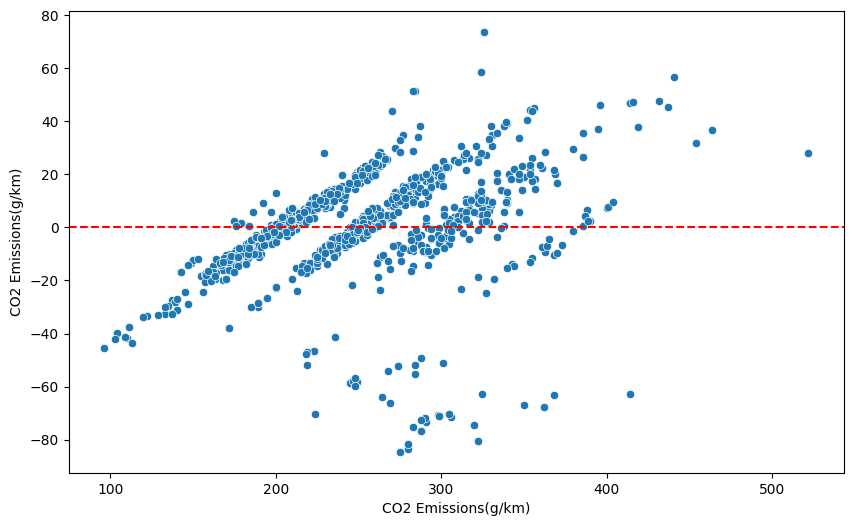

In [66]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y=residuals)
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.show()

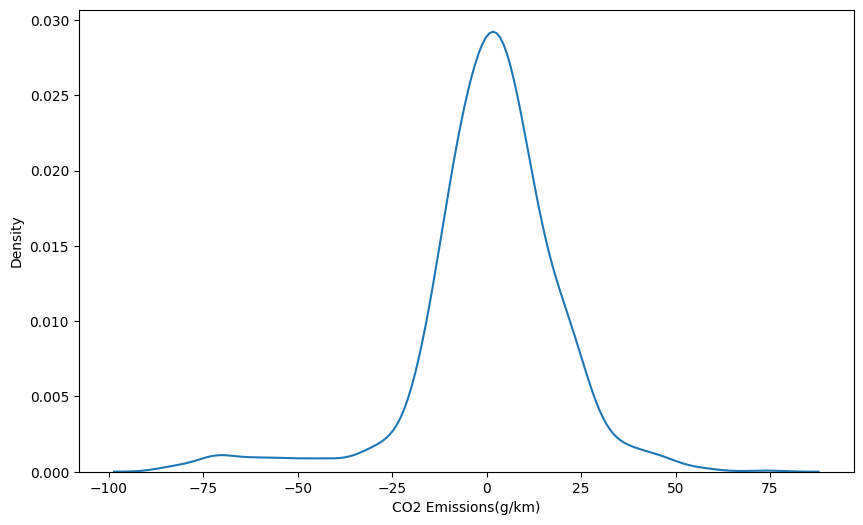

In [67]:
sns.kdeplot(residuals);

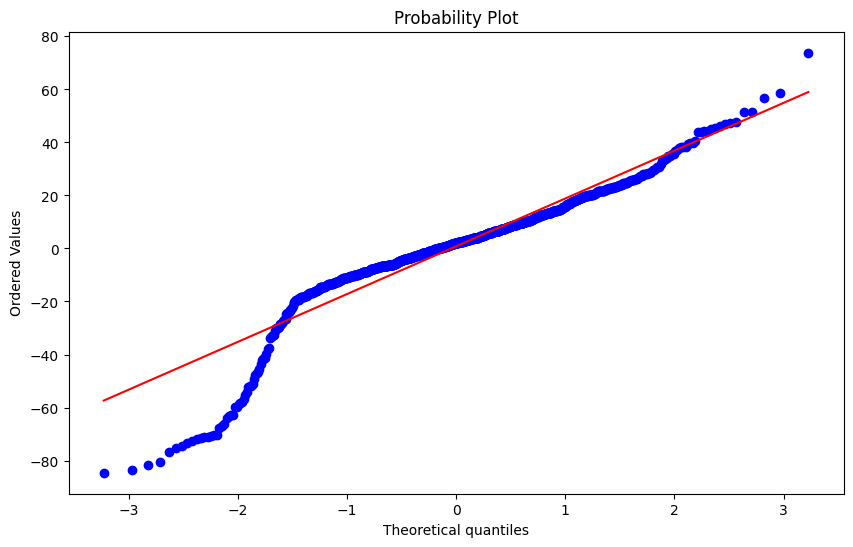

In [68]:
stats.probplot(residuals, dist = "norm", plot = plt);

In [69]:
from scipy.stats import skew

In [70]:
skew(residuals)

-1.1926653613725235

In [73]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
from yellowbrick.regressor import ResidualsPlot

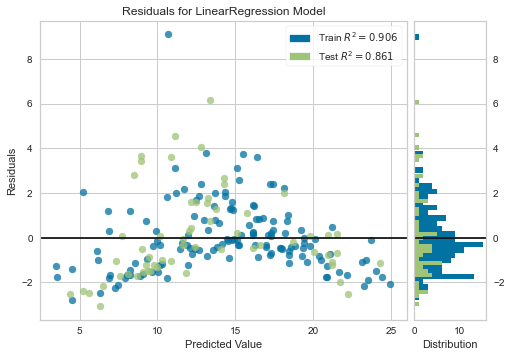

In [85]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

In [75]:
from yellowbrick.regressor import PredictionError

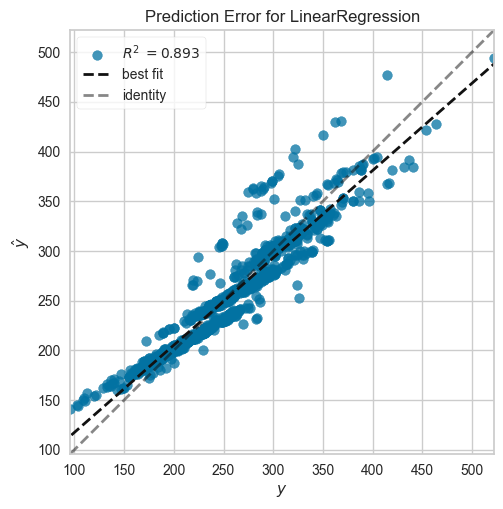

In [76]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();  

## Retraining Model on Full Data

In [88]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

## Coefficients